In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
pip install pytorch-lightning

In [3]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import pytorch_lightning as pl

In [4]:
torch.manual_seed(200)
np.random.seed(200)

pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)

In [5]:
df = pd.read_csv("/content/electricityConsumptionAndProductioction.csv")

In [6]:
df.shape

(46011, 10)

In [7]:
df

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30
...,...,...,...,...,...,...,...,...,...,...
46006,2024-03-31 19:00:00,5618,5902,1398,505,2294,1012,620,6,65
46007,2024-03-31 20:00:00,6107,6205,1395,671,2389,1037,645,0,66
46008,2024-03-31 21:00:00,5991,5855,1395,868,2201,705,621,0,66
46009,2024-03-31 22:00:00,5527,5726,1393,908,2088,648,622,0,66


In [8]:
df.columns

Index(['DateTime', 'Consumption', 'Production', 'Nuclear', 'Wind',
       'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass'],
      dtype='object')

In [9]:
data = []

for i in range(0, len(df)-24, 24):
    # Create a tuple or list of the new row
    new_row = (df["DateTime"].iloc[i], df["Consumption"].iloc[i:i+24].sum() )  # Example: Second column is double the first column
    data.append(new_row)

df_new = pd.DataFrame(data, columns=['DateTime', 'Consumption'])


In [10]:
#df_new['DateTime'] = pd.to_datetime(df_new['DateTime'])
df_new['DateTime'] = pd.to_datetime(df_new['DateTime']).dt.date

In [11]:
df_new

,DateTime,Consumption
0,2019-01-01,142984
1,2019-01-02,151729
2,2019-01-03,174098
3,2019-01-04,183242
4,2019-01-05,177114
...,...,...
1912,2024-03-26,154947
1913,2024-03-27,151938
1914,2024-03-28,142302
1915,2024-03-29,131618


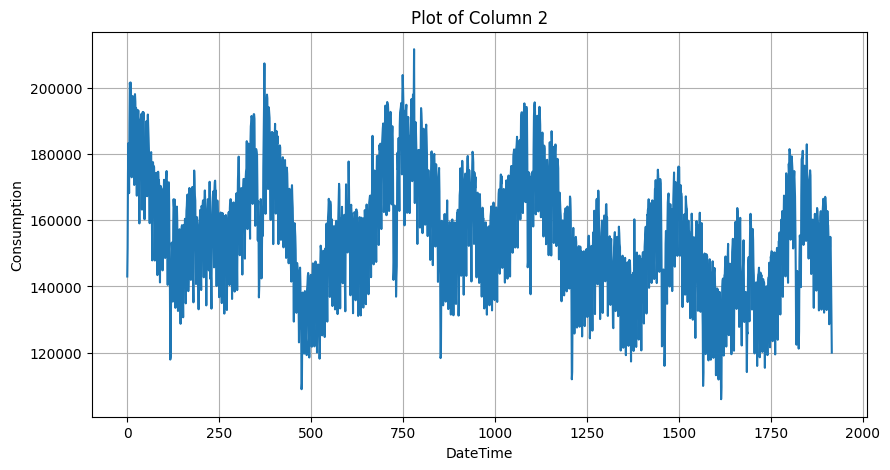

In [12]:
# Plot Column2
plt.figure(figsize=(10, 5))  # Set the figure size for better readability
plt.plot(df_new.index, df_new['Consumption'], linestyle='-')  # Line plot with markers
plt.title('Plot of Column 2')  # Title of the plot
plt.xlabel('DateTime')  # Label for the x-axis
plt.ylabel('Consumption')  # Label for the y-axis
plt.grid(True)  # Enable grid for easier readability
plt.show()  # Display the plot

# Split the df in train and test

test dataset

In [13]:
from datetime import datetime

# Define your date range as datetime.date
start_date = datetime.strptime('2023-03-30', '%Y-%m-%d').date()
end_date = datetime.strptime('2024-03-30', '%Y-%m-%d').date()

# Create the subdataframe by filtering rows within the date range
test_df = df_new[(df_new['DateTime'] >= start_date) & (df_new['DateTime'] <= end_date)]

In [14]:
test_df = test_df.set_index('DateTime').sort_index()

In [15]:
test_df.to_csv('test_df.csv', index=True)

In [16]:
test_df

,Consumption
DateTime,
2023-03-30,158561
2023-03-31,145071
2023-04-01,132638
2023-04-02,150525
2023-04-03,157641
...,...
2024-03-26,154947
2024-03-27,151938
2024-03-28,142302


train dataset

In [17]:
from datetime import datetime

# Define your date range as datetime.date
#start_date = datetime.strptime('2022-03-29', '%Y-%m-%d').date()
end_date = datetime.strptime('2023-03-29', '%Y-%m-%d').date()

# Create the subdataframe by filtering rows within the date range
#train_df = df_new[(df_new['DateTime'] >= start_date) & (df_new['DateTime'] <= end_date)]
train_df = df_new[df_new['DateTime'] <= end_date]

In [18]:
train_df = train_df.set_index('DateTime').sort_index()

In [19]:
train_df

,Consumption
DateTime,
2019-01-01,142984
2019-01-02,151729
2019-01-03,174098
2019-01-04,183242
2019-01-05,177114
...,...
2023-03-25,124442
2023-03-26,149989
2023-03-27,158317


In [20]:
train_df.to_csv('train_df.csv', index=True)  # Set index=False to not write row indices

#Synthetic

In [ ]:
#Uncomment to install ydata-synthetic lib
! pip install ydata-synthetic

In [22]:
# Importing the required libs for the exercise

from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
from ydata_synthetic.preprocessing.timeseries import processed_stock
from ydata_synthetic.synthesizers.timeseries import TimeSeriesSynthesizer

In [23]:
from ydata_synthetic.preprocessing.timeseries.utils import real_data_loading


In [24]:
# Specific to TimeGANs
seq_len = 31
n_seq = 1
hidden_dim = 24
gamma = 1

noise_dim = 32
dim = 128
batch_size = 128

log_step = 100
learning_rate = 5e-4
# For quick prototyping
# epochs=50000
epochs = 10000

gan_args = ModelParameters(
    batch_size=batch_size, lr=learning_rate, noise_dim=noise_dim, layers_dim=dim
)

train_args = TrainParameters(
    epochs=epochs, sequence_length=seq_len, number_sequences=n_seq
)

In [25]:
data_path = '/content/train_df.csv'
energy_data = pd.read_csv(data_path)
print(energy_data.shape)

(1550, 2)


In [26]:
energy_data = energy_data.set_index('DateTime').sort_index()

In [27]:
cols = list(energy_data.columns)

In [28]:
energy_data

,Consumption
DateTime,
2019-01-01,142984
2019-01-02,151729
2019-01-03,174098
2019-01-04,183242
2019-01-05,177114
...,...
2023-03-25,124442
2023-03-26,149989
2023-03-27,158317


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_column = scaler.fit_transform(energy_data[['Consumption']].values.reshape(-1, 1))

# Create a new DataFrame with the scaled values, keeping the same index as stock_data
energy_data_scaled = pd.DataFrame(scaled_column, index=energy_data.index, columns=['Consumption'])

In [30]:
energy_data_scaled

,Consumption
DateTime,
2019-01-01,0.331527
2019-01-02,0.416758
2019-01-03,0.634771
2019-01-04,0.723890
2019-01-05,0.664165
...,...
2023-03-25,0.150813
2023-03-26,0.399799
2023-03-27,0.480966


In [31]:
seq_data = []

for i in range(0, len(stock_data_scaled)-seq_len):
    seq_data.append(stock_data_scaled[i:i+seq_len].to_numpy())

In [32]:
print(len(seq_data), seq_data[0].shape)

1519 (31, 1)


In [33]:
if path.exists("synthesizer_stock.pkl"):
    synth = TimeSeriesSynthesizer.load("synthesizer_stock.pkl")
else:
    synth = TimeSeriesSynthesizer(modelname="timegan", model_parameters=gan_args)
    synth.fit(energy_data, train_args, num_cols=cols)
    synth.save("synthesizer_stock.pkl")

In [34]:
#synth_data = synth.sample(len(seq_data))
synth_data = np.asarray(synth.sample(len(seq_data)))
print(synth_data.shape)

(1519, 31, 1)


In [ ]:
#seq_data
for i in range(0, len(seq_data)):
    print(synth_data[i].var())

In [37]:
len(seq_data)

1519

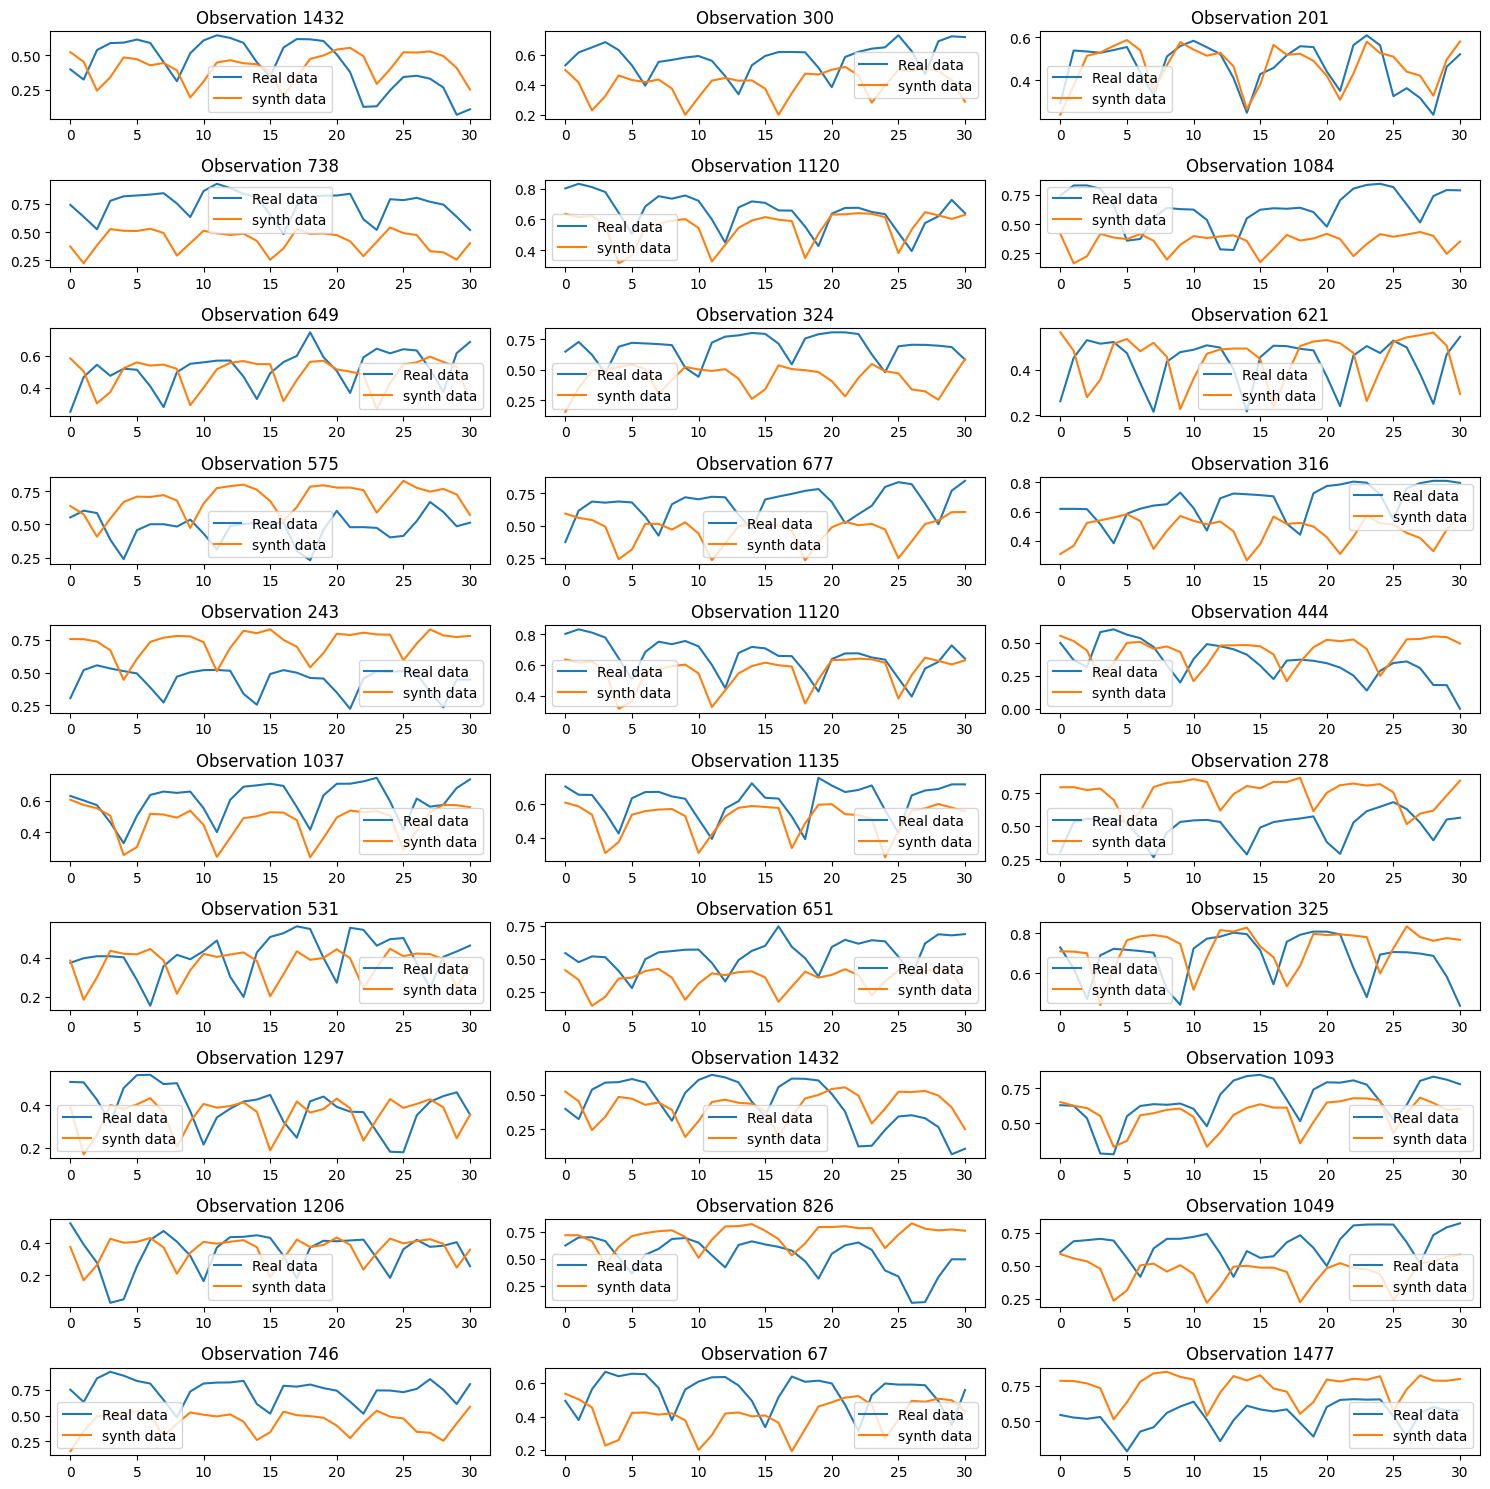

In [43]:
import matplotlib.pyplot as plt
import numpy as np


# Create subplots
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(15, 15))
axes = axes.flatten()

# Plot the data
for ax in axes:
    obs = np.random.randint(len(seq_data))  # Randomly select an observation
    ax.plot(seq_data[obs][:, 0], label='Real data')
    ax.plot(synth_data[obs][:, 0], label='synth data')
    ax.set_title(f'Observation {obs}')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [48]:
# Slice the array to keep only the first 30 elements in the second dimension
X_train_syn = synth_data[:, :30, :]

# Extract the last elements from the original array into a list
y_train_syn = synth_data[:, 30, :].flatten().tolist()

In [49]:
len(y_train_syn)

1519

In [50]:
X_train_syn.shape

(1519, 30, 1)

In [51]:
X_train_tensor = torch.from_numpy(X_train_syn)
X_train_tensor = X_train_tensor.float()

y_train_tensor = torch.tensor(y_train_syn).reshape(-1, 1)
y_train_tensor = y_train_tensor.float()

In [52]:
X_train_tensor.shape

torch.Size([1519, 30, 1])

test preperation

In [53]:
data_path = '/content/test_df.csv'
test_df = pd.read_csv(data_path)

In [54]:
test_df = test_df.set_index('DateTime').sort_index()

In [55]:
scaled_column = scaler.fit_transform(test_df[['Consumption']].values.reshape(-1, 1))

# Create a new DataFrame with the scaled values, keeping the same index as stock_data
test_data_scaled = pd.DataFrame(scaled_column, index=test_df.index, columns=['Consumption'])

In [56]:
test3 = test_data_scaled.to_numpy().reshape(-1, 1)

In [57]:
test3.shape

(367, 1)

In [58]:
#print(train)
sequenceSize = 10
def toSequence(data, sequenceSize):
    X = []
    y = []
    for i in range(len(test3) - sequenceSize):
        window = data[i: (i + sequenceSize)]
        target = data[i + sequenceSize]

        X.append(window)
        y.append(target)
    return torch.tensor(X, dtype = torch.float32).reshape(-1, sequenceSize, 1),  torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [59]:
X_test_tensor, y_test_tensor = toSequence(test3, sequenceSize)

<ipython-input-58-ebd2bb14f0d8>:12: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  return torch.tensor(X, dtype = torch.float32).reshape(-1, sequenceSize, 1),  torch.tensor(y, dtype=torch.float32).reshape(-1, 1)


In [60]:
y_test_tensor.shape

torch.Size([357, 1])

#LSTM

In [150]:
del model

In [63]:
class ElectricityLstm(pl.LightningModule):
    def __init__(self):
        super(ElectricityLstm, self).__init__()
        self.lossFunction = nn.MSELoss()
        self.lstm = nn.LSTM(input_size = 1,
                           hidden_size = 64,
                           batch_first = True)
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(in_features = 64, out_features = 32)
        self.fc2 = nn.Linear(in_features = 32, out_features = 1)
    def forward(self, X):
        out, _ = self.lstm(X)
        out = out[:, -1, :]
        out = self.dropout(out)
        out = self.fc1(out)
        out = self.fc2(out)

        return out
    def training_step(self, batch, batchIndex):
        X, y = batch
        out = self(X)
        loss = self.lossFunction(out, y)
        return {"loss": loss}
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr = 0.0001)

In [64]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32,
                         shuffle = True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [65]:
num_epochs = 10
model = ElectricityLstm()
trainer = pl.Trainer(max_epochs = num_epochs)
model.train()
trainer.fit(model, train_loader)

model.eval()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type    | Params | Mode 
-------------------------------------------------
0 | lossFunction | MSELoss | 0      | train
1 | lstm         | LSTM    | 17.2 K | train
2 | dropout      | Dropout | 0      | train
3 | fc1          | Linear  | 2.1 K  | train
4 | fc2          | Linear  | 33     | train
-------------------------------------------------
19.3 K    Trainable params
0         Non-trainable params
19.3 K    Total params
0.077     Total estimated model params size (MB)
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (48) is smaller th

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


ElectricityLstm(
  (lossFunction): MSELoss()
  (lstm): LSTM(1, 64, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
)

In [66]:
predictions = []
acutualLabels = []
for batch in test_loader:
    X, y = batch
    prediction = model(X)
    predictions.extend(prediction.detach().numpy().flatten())
    acutualLabels.extend(y.detach().numpy().flatten())

In [67]:
scaledPre = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
scaledYTest = scaler.inverse_transform(np.array(acutualLabels).reshape(-1, 1))

In [69]:
averageLoss = np.sqrt(np.mean((scaledPre - scaledYTest) ** 2))
print(f"average loss: {averageLoss}")

average loss: 19394.248046875


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(scaledYTest, scaledPre)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 16441.195


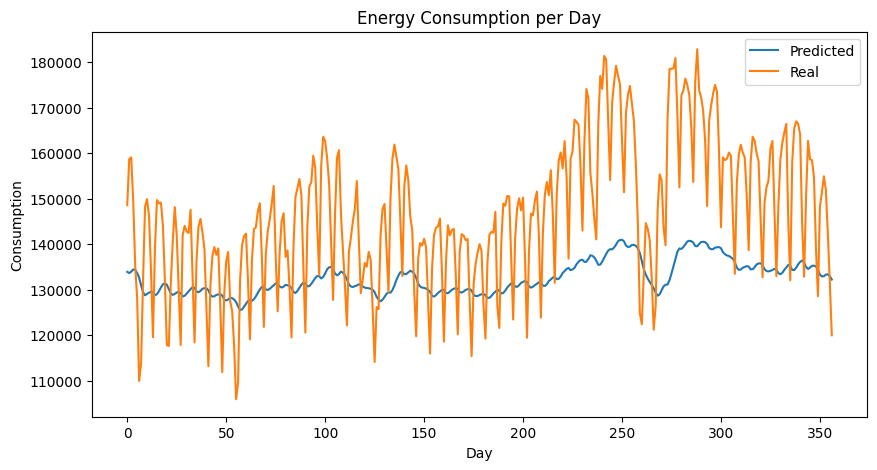

In [71]:
# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(scaledPre, label='Predicted')
plt.plot(scaledYTest, label='Real')
plt.title('Energy Consumption per Day')
plt.xlabel('Day')
plt.ylabel('Consumption')
plt.legend()
plt.show()